In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("goibibo_flights_data.csv")

In [3]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [4]:
df.isnull().sum()

flight date         0
airline             0
flight_num          0
class               0
from                0
dep_time            0
to                  0
arr_time            0
duration            0
price               0
stops               0
Unnamed: 11    300261
Unnamed: 12    300261
dtype: int64

In [5]:
df=df.dropna(axis=1)
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop


### To analyze the spike in flight prices in a particular month we need to extract month

In [6]:
df['flight date'] = pd.to_datetime(df['flight date'], format='%d-%m-%Y')
df['Month']=df['flight date'].dt.month
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Month
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,6
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,6
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,6
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,6
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,6


In [7]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Month
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,6
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,6
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,6
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,6
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,6


### We will remove comma from price and covert it to float

In [8]:
df['price']=df['price'].apply(lambda s:float(s.replace(',','')))
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Month
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,6013.0,non-stop,6
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,6013.0,non-stop,6
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,6016.0,non-stop,6
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,6015.0,non-stop,6
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,6015.0,non-stop,6


### Remove Flight Number as it is not required since we have the airline name and also the flight date because it is not required since we already have the month

In [9]:
df.drop(columns=['flight date','flight_num'],inplace=True)

In [10]:
df.head()

,airline,class,from,dep_time,to,arr_time,duration,price,stops,Month
0,SpiceJet,economy,Delhi,18:55,Mumbai,21:05,02h 10m,6013.0,non-stop,6
1,SpiceJet,economy,Delhi,06:20,Mumbai,08:40,02h 20m,6013.0,non-stop,6
2,AirAsia,economy,Delhi,04:25,Mumbai,06:35,02h 10m,6016.0,non-stop,6
3,Vistara,economy,Delhi,10:20,Mumbai,12:35,02h 15m,6015.0,non-stop,6
4,Vistara,economy,Delhi,08:50,Mumbai,11:10,02h 20m,6015.0,non-stop,6


### Now we visualize the data

#### Calculating the mean

In [11]:
mean_prices = df.groupby('airline')['price'].mean()
print(mean_prices)

airline
Air India    23837.558101
AirAsia       4132.026525
GO FIRST      5708.459464
Indigo        5377.492092
SpiceJet      6241.051826
StarAir       4982.016393
Trujet        3277.097561
Vistara      30831.962756
Name: price, dtype: float64


### Visualizing Airline vs Price

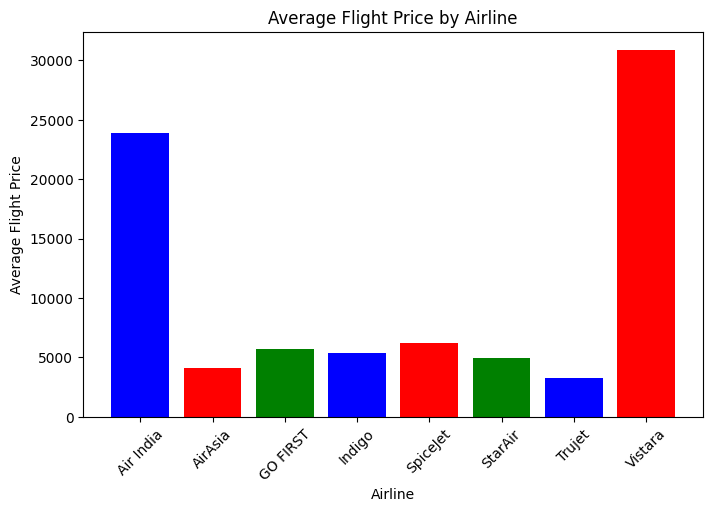

In [12]:
plt.figure(figsize=(8, 5))
plt.bar(mean_prices.index, mean_prices.values, color=['blue', 'red', 'green'])

plt.xlabel("Airline")
plt.ylabel("Average Flight Price")
plt.title("Average Flight Price by Airline")
plt.xticks(rotation=45) 
plt.show()

### From the above graph we can see that Vistara is most expensive and Trujet is the cheapest

### Now we will see the Price trends over the months

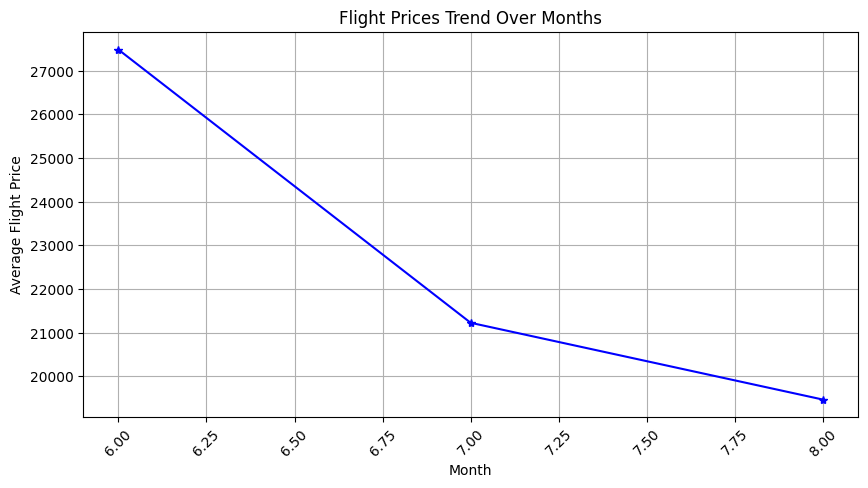

In [74]:
df2 = df.groupby(["Month"]).agg({"price": "mean"}).reset_index().sort_values(by='price')

plt.figure(figsize=(10, 5))
plt.plot(df2['Month'], df2['price'], marker='*', linestyle='-', color='b')

plt.xlabel("Month")
plt.ylabel("Average Flight Price")
plt.title("Flight Prices Trend Over Months")

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Flight prices are highest in June and least in August. Probably, June is the vacation time and summer vacations when people travel more

### Impact of stops on the Prices

C:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


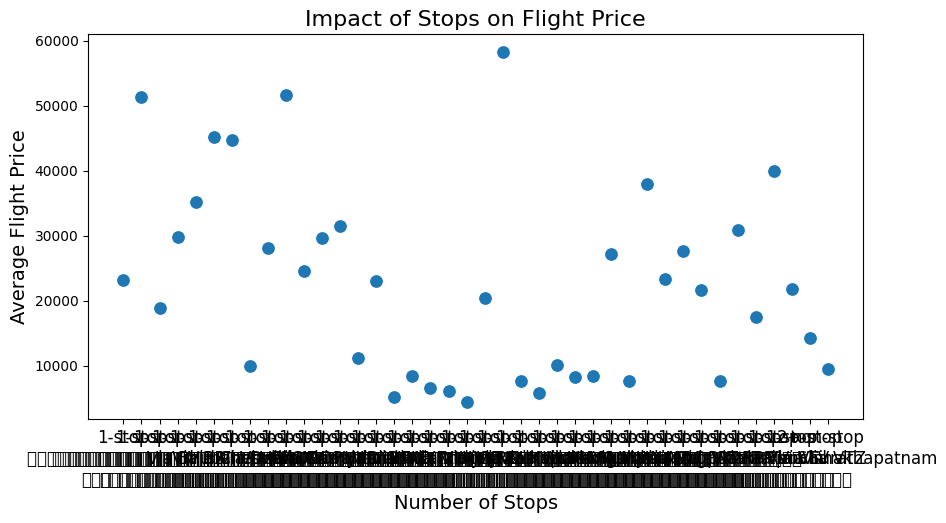

In [49]:
df2 = df.groupby("stops").agg({"price": "mean"}).reset_index()
df2["stops"] = df2["stops"].astype(str)  # Convert stops to categorical

# Increase figure size to spread out the stops
plt.figure(figsize=(10, 5))

# Use scatterplot to visualize stops vs price
sns.scatterplot(x='stops', y='price', data=df2, s=100)  # 's' increases dot size

# Adjust x-axis for better spacing
plt.xticks(rotation=0, fontsize=12)  # Ensure x-labels are readable
plt.xlabel("Number of Stops", fontsize=14)
plt.ylabel("Average Flight Price", fontsize=14)
plt.title("Impact of Stops on Flight Price", fontsize=16)

# Show the plot
plt.show()


### What can we conclude from the graph above-
If prices increase with more stops → More stops = More expensive flights <br>
If prices decrease → More stops = Cheaper flights (usually budget airlines)<br>
Direct Flights are cheapest may be due to low distance <br>
Flights with 1 stop are expensive <br>
Non Stop Flights have least price <br>
Flights with 1 stop have highest <br>
While with 2 stops is medium

### Impact of Class on Price

<Axes: xlabel='class', ylabel='price'>

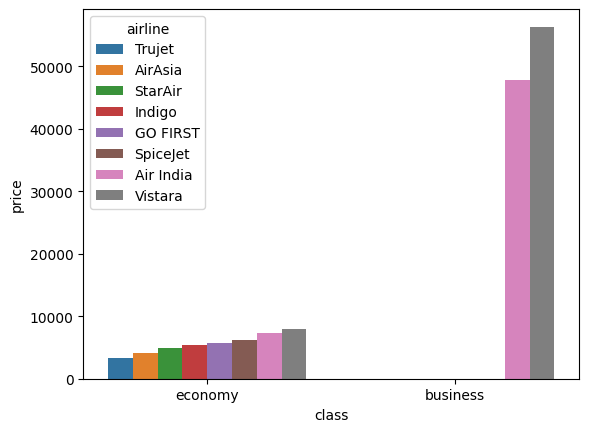

In [51]:
df2=df.groupby(["airline","class"]).agg({"price":"mean"}).reset_index().sort_values(by='price')
sns.barplot(x='class',y='price',data=df2,hue='airline')

### Business class is available in Air India and and Vistara only